In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset_url = "C:\\Users\\saile\\Downloads\\customer_data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())    

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())    

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())   


First 5 rows of the dataset:
   Customer ID  Age  Annual Income  Spending Score
0            1   31          92929              14
1            2   66          78074              61
2            3   40          34540              84
3            4   54         114798              70
4            5   63          91867              79

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     20 non-null     int64
 1   Age             20 non-null     int64
 2   Annual Income   20 non-null     int64
 3   Spending Score  20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes
None

Missing Values in Dataset:
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64



First 5 rows of scaled features:
[[-1.10623575  0.61867516 -1.29915671]
 [ 1.26911709  0.07182331  0.54001092]
 [-0.49543074 -1.53077839  1.44002913]
 [ 0.4547104   1.42373089  0.89219196]
 [ 1.06551542  0.57958013  1.244373  ]]


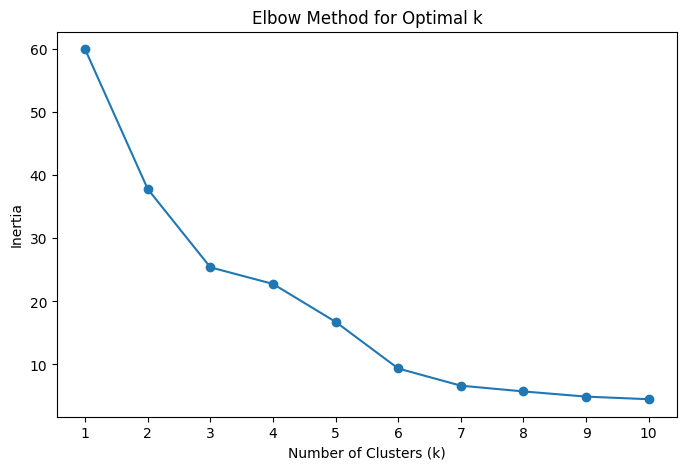

In [10]:
features = df[['Age', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first few rows of the standardized data
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])   

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()



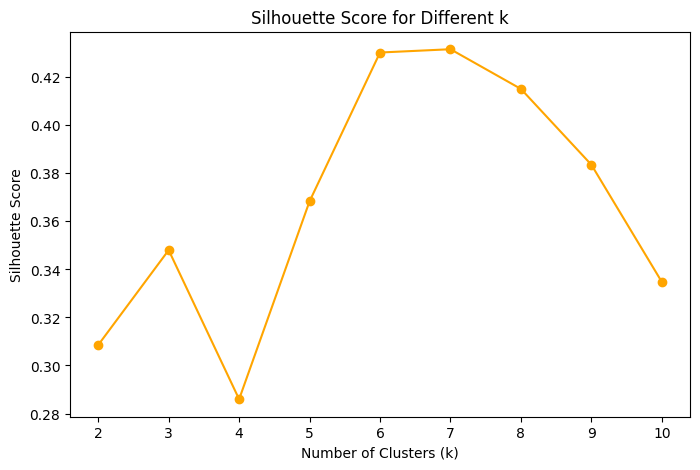

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Silhouette score is not defined for k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.show()

In [11]:
# Perform K-Means clustering with the optimal k (from the elbow method, assume k = 3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Assign cluster labels to each customer if not already present
if 'Cluster' not in df.columns:
    df['Cluster'] = kmeans.labels_

# Display the first few rows to verify

# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
print(df.head())   


First 5 rows with cluster labels:
   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   31          92929              14        2
1            2   66          78074              61        0
2            3   40          34540              84        1
3            4   54         114798              70        0
4            5   63          91867              79        0


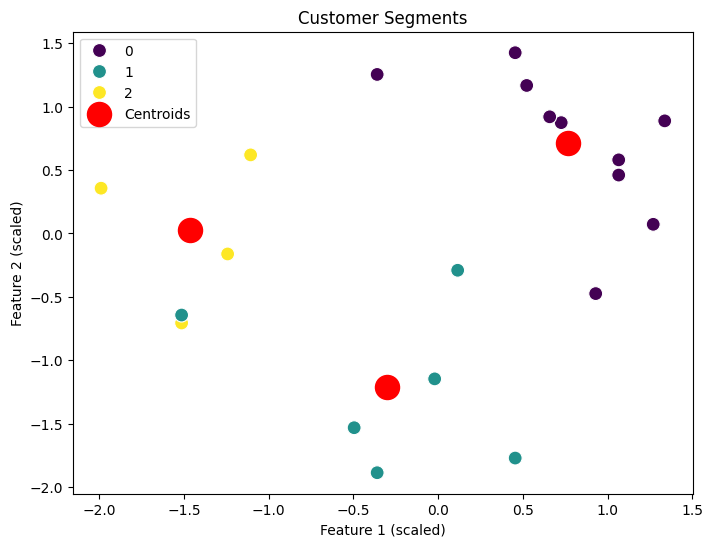

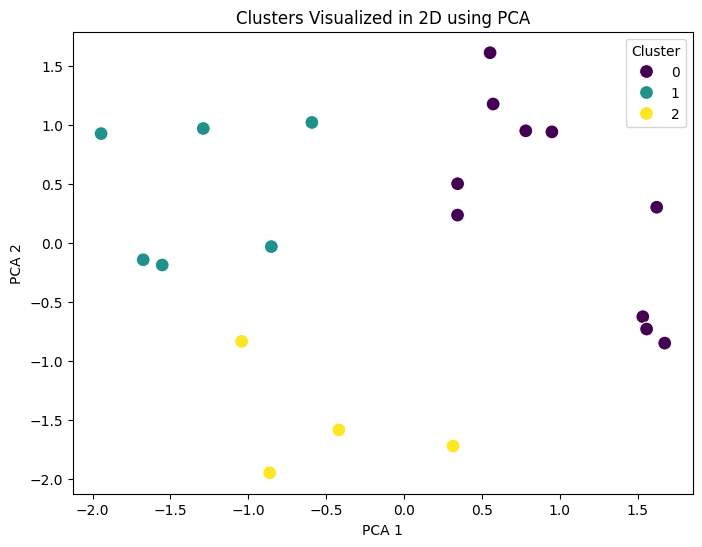

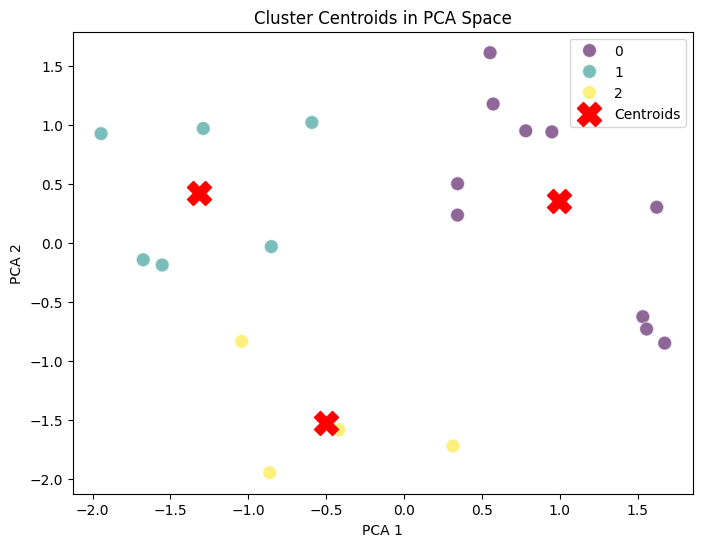

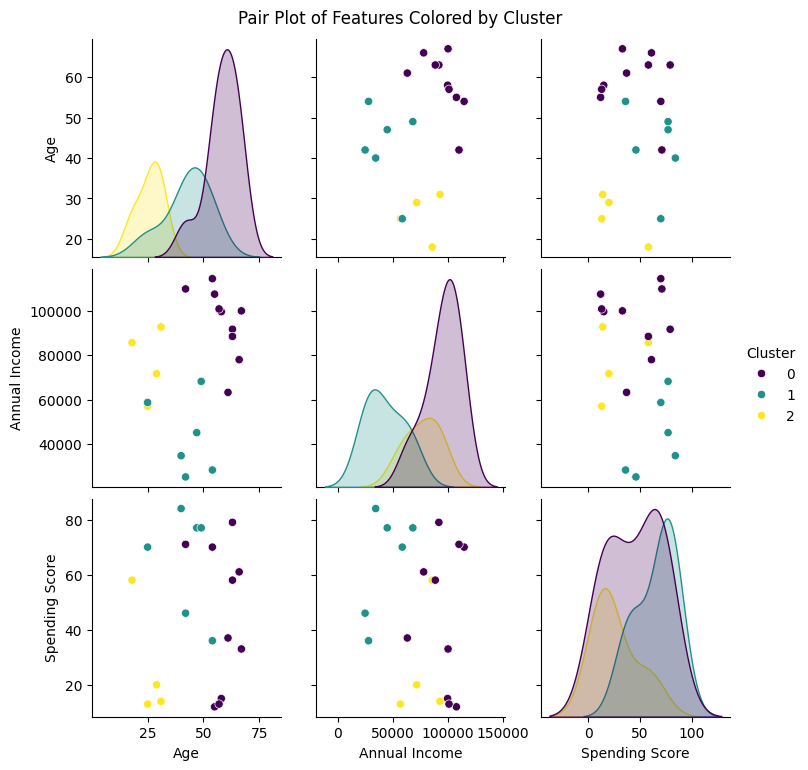

In [12]:
# Visualize clusters (using the first two features for plotting)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Add PCA components to DataFrame for plotting
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Get centroids in PCA space
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Cluster Centroids in PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

sns.pairplot(df, vars=['Age', 'Annual Income', 'Spending Score'], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)
plt.show()
